<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_ECDA_2425/blob/main/Big%20Data%20Analytics/BDAO_Data_cleaning_EDA_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding and Preprocessing Data with Pandas

Welcome to this interactive Python notebook, where we embark on a journey through the essential stages of data understanding and preprocessing. Our goal is to equip you with the knowledge and practical skills to prepare datasets for further analysis or machine learning tasks. This notebook serves as a comprehensive guide, designed for both beginners data enthusiasts, educators, or anyone looking to refine their data handling capabilities.

## Notebook Overview

In data science and machine learning, the quality and preparation of the data are as crucial as the models themselves. Raw data often comes with various challenges such as missing values, outliers, and unnecessary information that might skew analysis or model performance. Addressing these issues effectively requires a systematic approach to understanding and preprocessing the data.

### What You Will Learn:

- **Data Loading:** How to import your data into a Pandas DataFrame, the first step in any data analysis task.
  
- **Data Inspection:** Techniques to explore and inspect the data to understand its structure, content, and potential issues that need addressing.
  
- **Data Cleaning:** Strategies for dealing with common data issues, including handling missing values, removing duplicates, and correcting data types.
  
- **Outlier Detection and Handling:** Methods to identify and mitigate the impact of outliers that could potentially skew the analysis.
  
- **Feature Engineering:** Basic techniques for transforming existing features and creating new ones to better represent the underlying patterns in the data.
  
- **Correlation Analysis:** Understanding the relationships between features using correlation matrices and visualizations.
  
- **Feature Selection:** Identifying and selecting the most relevant features for your analysis or predictive modeling tasks.

Throughout this notebook, we will apply these concepts to the *Online Retail II* dataset, a rich dataset that presents common challenges in data analysis. We will use Pandas, a powerful and flexible data manipulation library in Python, to perform our tasks.

# Data Preprocessing for Online Retail Dataset

This notebook outlines the data preprocessing steps applied to the Online Retail Dataset. The objective is to prepare the dataset for exploratory data analysis (EDA) and clustering. Each step is crucial for ensuring that the data is clean, relevant, and formatted correctly for further analysis or modeling.

---
### 1. Importing Libraries and Loading the Dataset

First, we import the necessary libraries and load the dataset into a pandas DataFrame.

In [26]:
# First, we need to load the dataset into Google Colab.
# This statement allows you to select the file from your laptop and upload it to Google Cloud.
# Please wait until you see 100% done and the play button is resumed. it might take a while to upload because the dataset is large

# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()

In [27]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load the dataset
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
# The encoding='ISO-8859-1' argument is telling the pd.read_csv() function how to interpret the characters in the 'merged_online_retail_II.csv' file.
# 'ISO-8859-1' (also known as 'latin1') is a specific character encoding standard. It's often used for Western European languages.
# Thus, if your data is not in Western European languages, you should remove or change the encoding

---

## 2. Understanding the Dataset

Before going though preprocessing tasks, it's crucial to gain an understanding of the dataset you're working with. This initial exploration is a step that informs how you approach cleaning and preparing your data for analysis or modeling. Let's outline the key aspects we aim to uncover about our dataset during this initial exploration phase:

### Dimensions of the Dataset

Understanding the size of your dataset gives you a sense of the volume of data you're dealing with. It involves finding out how many rows (observations) and columns (features/attributes) your dataset contains. This information can help in estimating the resources you might need for processing the data and whether the dataset is sufficiently large for the intended analysis.

### Data Types of Each Variable

Datasets comprise various types of information, and each feature (column) within a dataset can hold data of a particular type — numerical (integers or floats), categorical (strings or objects), or date/time. Knowing the data type of each variable is essential for two reasons:
- It helps in deciding the appropriate statistical methods or machine learning models that can be applied.
- It informs the necessary data type conversions or transformations needed before analysis.

### Previewing the Data

Taking a peek at the first few and last few rows of the dataset can provide a quick snapshot of what your data looks like. This step helps in confirming if the data matches your expectations based on what you know about the dataset or the domain. It also allows you to spot any obvious inconsistencies or anomalies in the data, such as formatting errors, missing values, or outliers.

### Attributes

Knowing the name of each attribute is crucial for understanding the features available in your dataset. Attributes give insights into the information captured by the dataset, which is vital for both analysis and storytelling with data. It's also the first step in identifying any irrelevant features that might be excluded from further analyses.

By addressing these aspects, you're laying the foundation for effective data cleaning and preparation. This approach ensures that the subsequent steps you take are informed and intentional, leading to more reliable outcomes from your data analysis efforts.

We can visualise the dataset using different [Pandas functions, such as head() (first five rows of the dataset) and tail() (last five rows of the dataset).](https://www.geeksforgeeks.org/pandas-functions-in-python/)

In [30]:
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
print("Last five rows of the dataset:")
df.tail(10)

Last five rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [33]:
# Verify the dataset size
print("Size of the dataset:", df.shape)
print("Hence, this dataset has",df.shape[0], "observations (rows) and",df.shape[1], "features/aatributes (columns)")

Size of the dataset: (541909, 8)
Hence, this dataset has 541909 observations (rows) and 8 features/aatributes (columns)


### 3. Data Preprocessing: Introduction to Data Cleaning

Data cleaning is a critical preprocessing step aimed at rectifying irregularities and errors in the dataset. It involves identifying and correcting (or removing) corrupt, inaccurate, or irrelevant parts of the data, which are often inevitable in large datasets. This step is essential for ensuring that subsequent data analysis and modeling are based on reliable and accurate data, thereby leading to more valid conclusions and predictions.

Data, especially when collected from real-world sources, is rarely clean and ready for analysis. It may contain errors such as missing values, duplicates, or outliers that can significantly skew analysis results and predictive model performance. Data cleaning helps in:
- **Improving Data Quality:** By removing or correcting anomalies and errors, the overall quality of the data is enhanced.
- **Enhancing Analysis Accuracy:** Clean data reduces the risk of misleading results in analysis and ensures that insights derived from the data are valid.
- **Boosting Model Performance:** Machine learning models trained on clean data are likely to perform better, as they learn the underlying patterns in the data rather than being influenced by noise or errors.

### Data Cleaning in the Online Retail II Dataset

Given its comprehensive capture of online shopping, the dataset is prone to common data quality issues, making data cleaning an indispensable step. The executed data cleaning steps include:

1. **Handling Missing Values:** Missing data can distort statistical analyses and hinder model performance. By removing missing values or replacing them, we ensure that analyses are based on complete observations and that models learn from the most accurate representations of the data.

2. **Dropping Duplicates:** Duplicate entries can arise from data collection or integration processes, leading to biased analyses by artificially inflating certain observations. Identifying and removing duplicates helps maintain the integrity of statistical measures and model estimates.

3. **Removing Outliers:** Outliers can significantly affect statistical analyses and predictive modeling, potentially leading to erroneous conclusions. Identifying and addressing outliers helps in focusing the analysis on the typical patterns within the data, thereby improving the robustness of statistical estimates and model predictions.



Missing data can significantly impact the quality of the analysis. Therefore, we need to check for missing values and handle them appropriately. Handling missing values is crucial in data preprocessing, especially in fields like data analysis, machine learning, and statistics. The two primary methods for dealing with missing values are removing or replacing them. Choosing between these methods depends on the context and nature of your data.

In [34]:
# First, check and print the number of missing values (if there are any) in the dataset
print("Number of missing values:")
print(df.isnull().sum())

Number of missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Observe that the attributes Description and CustomerID contains missing values. We will deal with missing values by dropping rows with missing CustomerID values (as the dataset is big) and filling missing descriptions values with the string "No Description".

In [35]:
# For missing descriptions, replace with 'No Description'
df['Description'] = df['Description'].fillna('No Description')

# Then, check for missing values again
print("Number of missing values:")
print(df.isnull().sum())

# Verify the dataset size
print("Size of the dataset:", df.shape)
print("Hence, this dataset has",df.shape[0], "observations (rows) and",df.shape[1], "features/aatributes (columns)")

Number of missing values:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Size of the dataset: (541909, 8)
Hence, this dataset has 541909 observations (rows) and 8 features/aatributes (columns)


In [36]:
# Drop the 'CustomerID' column
df = df.dropna(subset=['CustomerID'])
# Then, check for missing values again
print("Number of missing values:")
print(df.isnull().sum())
# Verify the dataset size
print("Size of the dataset:", df.shape)
print("Hence, this dataset has",df.shape[0], "observations (rows) and",df.shape[1], "features/aatributes (columns)")

Number of missing values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Size of the dataset: (406829, 8)
Hence, this dataset has 406829 observations (rows) and 8 features/aatributes (columns)


Additinally, we will check for and remove duplicates.

In [37]:
# Then, check the total number of duplicate rows (if there are any) in the dataset
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
5225


In [38]:
# 2. Removing duplicates
# Drop duplicate rows to ensure data quality
df.drop_duplicates(inplace=True)

# Check the final size of the dataset
print("Size of the dataset:")
print(df.shape)

Size of the dataset:
(401604, 8)


---
### Handling Outliers

Outliers can distort statistical analyses. We identify and filter out outliers based on the [Interquartile Range (IQR)](https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/) for Quantity and UnitPrice.

The Interquartile Range (IQR) outlier identification method is a statistical technique used to detect outliers by focusing on the spread of the middle 50% of data points. The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the dataset, which represents the range within which the central half of the data lies.

Outliers are then identified by determining which data points fall outside of this central range by a certain distance. Typically, data points are considered outliers if they are more than 1.5 times the IQR below the first quartile (Q1 - 1.5\*IQR) or above the third quartile (Q3 + 1.5\*IQR). This method is widely used due its robustness to the presence of outliers, as it relies on percentiles that are not influenced by extreme values.

The IQR method is particularly useful because it can effectively handle skewed distributions and is less affected by extreme values compared to methods that rely on mean and standard deviation. This makes it a popular choice for outlier detection in many fields, including statistics, finance, and data science.

![Interquartile](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*reUPZZX2opkr1KcEdaChOg.png)

[Click here to read more about outliers](https://medium.com/@ebimsv/machine-learning-series-day-8-preprocessing-part-3-d4feb4c7ce90)




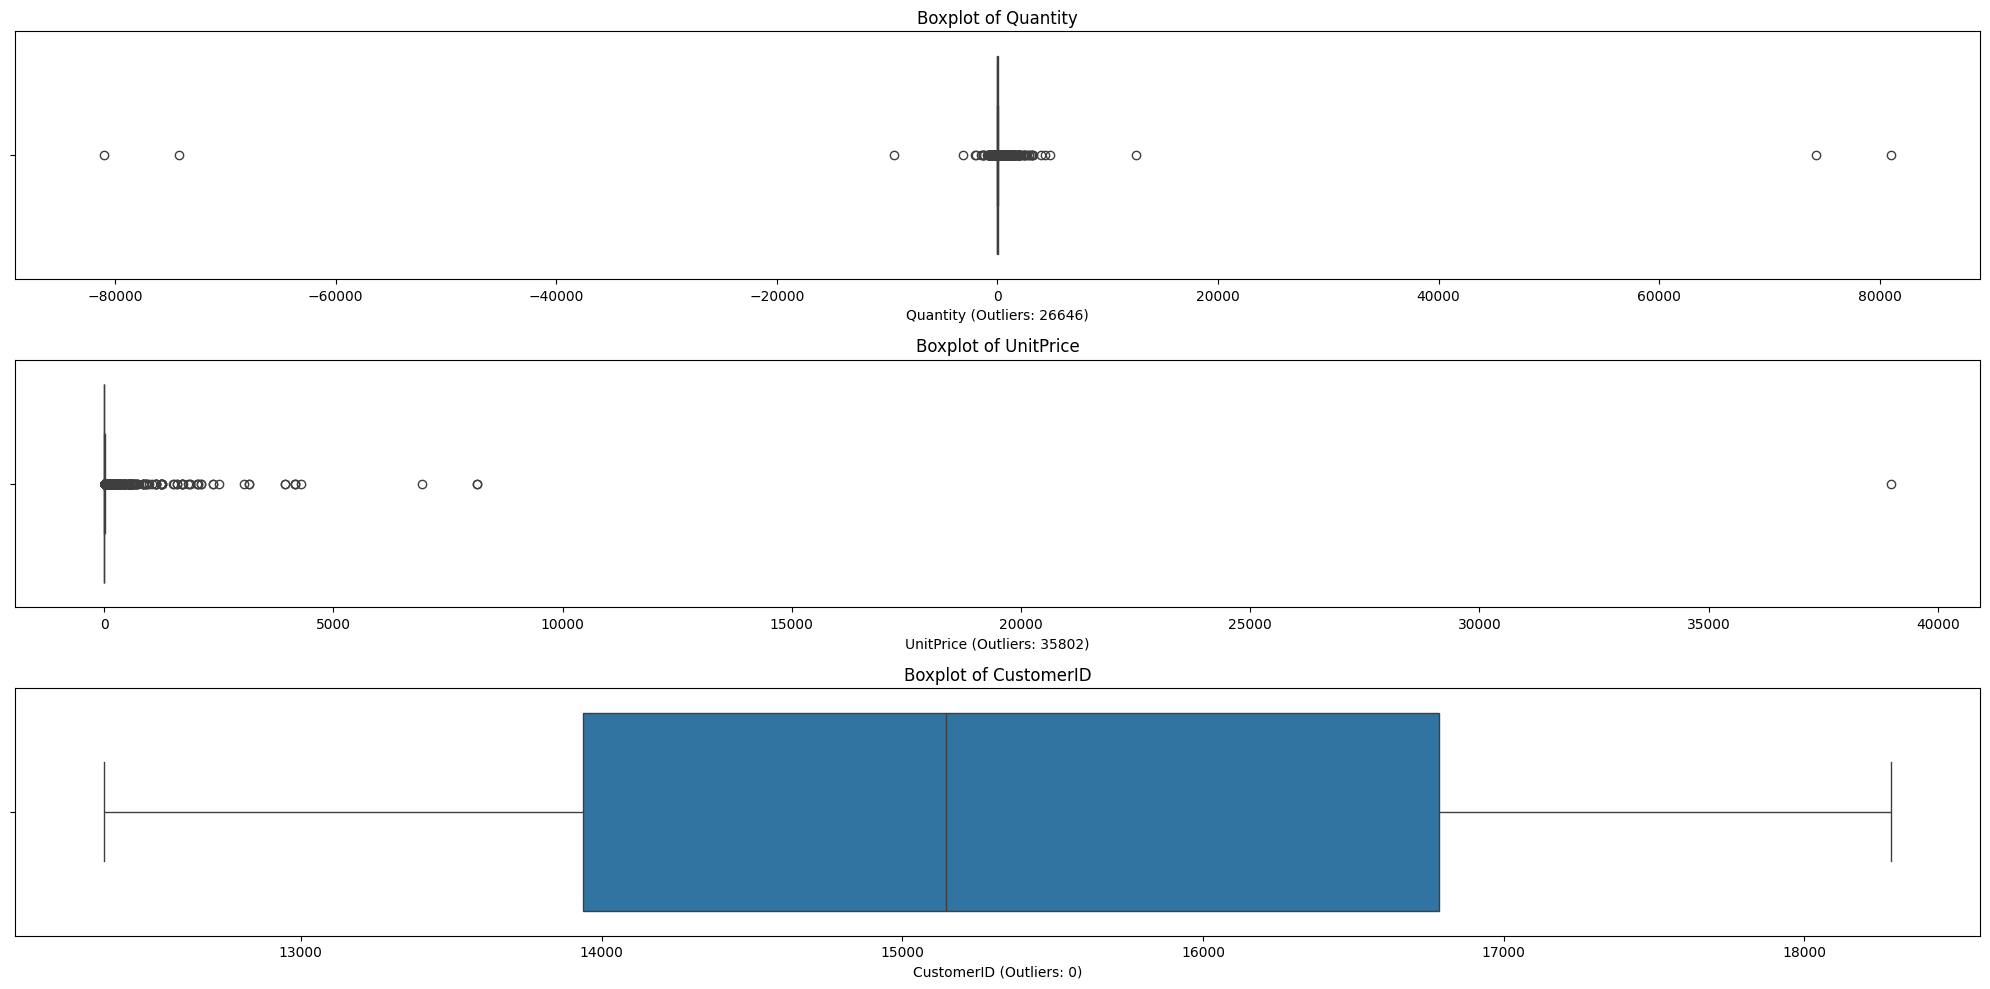

In [39]:
# Select numeric columns for plotting boxplots and calculating outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for each numeric column and calculating the number of outliers
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    # Calculating IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    n_outliers = outliers.shape[0]

    plt.xlabel(f'{col} (Outliers: {n_outliers})')
plt.tight_layout()
plt.show()

In [40]:
# Handling Outliers
# Identify outliers in 'Quantity' and 'UnitPrice'
Q1 = df[['Quantity', 'UnitPrice']].quantile(0.25)
Q3 = df[['Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR
df = df[~((df[['Quantity', 'UnitPrice']] < (Q1 - 1.5 * IQR)) | (df[['Quantity', 'UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df.shape)

(339453, 8)


We removed "outliers" using the IQR method. However, you must understand the data and think if it actually contain outliers or not. In this case, it is just a gap between the price and amount of items sold, something that can easily happen in many retail. Thus, it is unlikely to have outliers

In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


---
### 4. Data Transformation

Data transformation is part of the data preprocessing phase, crucial for preparing the raw dataset into a format that is suitable for further analysis, visualization, or modeling. This process involves converting data into a standardized format, correcting data types, and potentially creating new variables that are more informative or relevant for the analysis. Performing these tasks helps in enhancing the quality of the data, ensuring accuracy in the results, and improving the performance of predictive models.

Data transformation is necessary when the format of raw data are not suitable for analysis. For instance, variables may be in incorrect data types, dates may be represented as strings, or there may be inconsistencies such as the use of placeholder values for missing data. Without transformation, these issues can lead to incorrect analyses, errors in data processing, or inefficient modeling. By standardizing the dataset, we ensure that the data adheres to a consistent format, thereby enabling accurate and meaningful insights.

### Data Transformation in the Online Retail II Dataset

Given the dataset's scope, capturing detailed electricity consumption within households, it includes a variety of data types and potential for missing values. The following transformations are crucial for this dataset:

1. **Converting Date and Time Formats:** Dates and times are initially represented as strings, which limits the ability to perform time-series analysis or extract date-related features. Converting these to appropriate datetime formats enables more sophisticated temporal analyses and facilitates easier extraction of date and time components.

2. **Creating New Variables:** Extracting the day, month and year from the date not only simplifies the analysis of seasonal patterns and trends over time but also enriches the dataset with additional features that may be relevant for predictive modeling.

Transforming data into a suitable format for analysis is crucial. We convert the InvoiceDate from string to datetime and create new columns for Year, Month, Day, and TotalPrice.

In [42]:
# First check the data types
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


**Common data types you might see include:**

**object**: Typically represents strings (text)

**int64**: Represents integers (whole numbers)

**float64**: Represents floating-point numbers (numbers with decimal points)

**datetime64**: Represents dates and times

In this dataset, we have string data, integers and float numbers.One thing we have spot is that the InvoiceDate is not in Datetime format,so if you want it to be datetime format we will need to do transformation later.

In [43]:
# Data Transformation
# Convert InvoiceDate from string to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting Year, Month, Day for further analysis. Hence, create a new column for each
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

# Creating a 'TotalPrice' column for each row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# check the data types again
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
Year,int32
Month,int32


In [45]:
#Check the first five rows
print("First five rows of the dataset:")
df.head(20)

First five rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,12,1,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,11.10
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010,12,1,12.60
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010,12,1,12.60


In [46]:
#Check the last five rows
print("Size of the dataset:")
print(df.shape)

Size of the dataset:
(339453, 12)


---
### 5. Feature Selection Matrix Analysis

Selecting the right features is crucial for effective modeling. We conclude our preprocessing by analysing the correlation among features.

**Correlation Analysis:** A correlation matrix enables exploring the relationships between different numerical features. This analysis can highlight potential dependencies and associations between attributes, aiding in feature selection and model development.


**Using Correlation Matrix for Feature Selection**

In data analysis and machine learning, understanding the relationships between features is crucial for both interpreting data and improving model performance. A **correlation matrix** is a powerful tool that provides a comprehensive overview of how each variable in a dataset relates to the others. By quantifying the degree to which pairs of variables are linearly related, it offers valuable insights that can guide the feature selection process.

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have:
- A correlation of 1, they have a perfect positive linear relationship.
- A correlation of -1, they have a perfect negative linear relationship.
- A correlation of 0, there is no linear relationship between them.

Feature selection involves choosing a subset of relevant features for use in model construction. The correlation matrix is instrumental in this process for several reasons:
- **Reducing Dimensionality:** It helps in identifying the relevant features to be analysing, consequently reducing the number of features, simplifying the model, reducing the risk of overfitting, and can improve model performance.
- **Enhancing Interpretability:** By focusing on a subset of relevant and relatively independent features, we can build models that are simpler and more straightforward to explain.
- **Improving Accuracy:** Removing redundant features can lead to more accurate models by reducing the noise in the training data.

**Visualizing the Correlation Matrix**

The visualization of a correlation matrix using a heatmap is a straightforward way to grasp the relationships between features at a glance. Heatmaps color-code the cells based on the correlation values, making it easier to identify highly correlated pairs or variables that are not linearly related at all.

By systematically analyzing and visualizing the correlation matrix, data scientists can make informed decisions on which features to include in their models, ultimately leading to more efficient, accurate, and interpretable outcomes.

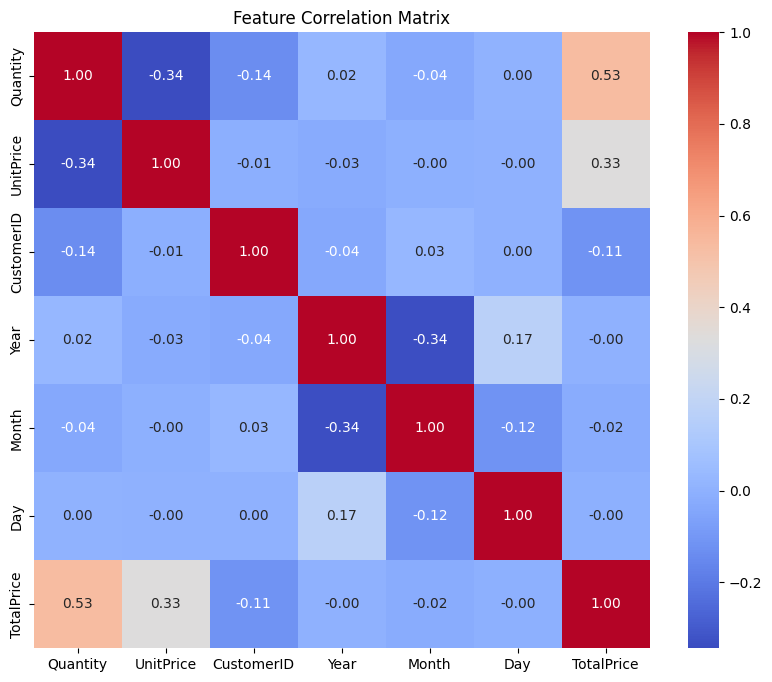

In [47]:
# Feature Selection
# Compute the correlation matrix to identify relationships between variables
correlation_matrix = df.corr(numeric_only=True)

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

Save the Preprocessed dataset.

In [48]:
df.to_csv("OnlineRetailClean.csv", index = None, header=True)
files.download('OnlineRetailClean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

# Exploratory Data Analysis Overview

We can uncover insights from the Individual Household Electric Power Consumption dataset through Exploratory Data Analysis (EDA). EDA is a process that allows us to understand the underlying patterns, relationships, and anomalies in the data, which can inform further analysis, hypothesis generation, and predictive modeling.

1. **Descriptive Statistics:** We can analyse the data by computing descriptive statistics, providing a summary overview of the central tendency, dispersion, and shape of the dataset's distribution. This step helps identify initial patterns, potential outliers, and the general data structure.

In [49]:
# Ensure matplotlib and seaborn are imported
import matplotlib.pyplot as plt
import seaborn as sns

#Copy DataFrame for EDA Analysis
df_for_eda = df.copy()

# Basic Information
print("Descriptive Statistics:")
df_for_eda.describe() # Get statistical summaries of numeric columns

Descriptive Statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,TotalPrice
count,339453.000000,339453,339453.000000,339453.000000,339453.000000,339453.000000,339453.000000,339453.000000
mean,7.350022,2011-07-12 07:31:33.842564096,2.203459,15312.608184,2010.934810,7.649262,15.043470,12.522085
min,-13.000000,2010-12-01 08:26:00,0.000000,12347.000000,2010.000000,1.000000,1.000000,-81.000000
25%,2.000000,2011-04-08 08:21:00,1.250000,13983.000000,2011.000000,5.000000,7.000000,3.750000
50%,6.000000,2011-08-03 09:09:00,1.650000,15218.000000,2011.000000,9.000000,15.000000,10.080000
75%,12.000000,2011-10-21 14:41:00,2.950000,16813.000000,2011.000000,11.000000,22.000000,17.340000
max,27.000000,2011-12-09 12:50:00,7.500000,18287.000000,2011.000000,12.000000,31.000000,178.800000
std,6.890369,NaN,1.549676,1711.910209,0.246861,3.409939,8.658657,13.432954


We have noticed that there are negative values in the quantity column. This could be because the invoice is also recording the return orders. Then this gives us ideas when it comes to analysis that we might need to segment the orders into purchase and return and analyse them separately. Anothing we spot is that there are products with price of 0. Are they free products? The range of price is really large. We might need to further investigate it. This descriptive statistics can bring us some ideas how our data look like.
     

In [50]:
# Here we further check how many invoice with negative quantity
len(df_for_eda[df_for_eda['Quantity'] < 0])

6188

In [51]:
# Here we further check how many invoice with 0 price
len(df_for_eda[df_for_eda['UnitPrice']==0])

31

In [52]:
# Given we have large amount of data, we will remove the data with negative quantity and price of 0 and store the new data as order data
order = df_for_eda[(df_for_eda['Quantity'] > 0) & (df_for_eda['UnitPrice']>0)]
order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34


In [53]:
order.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,TotalPrice
count,333234.000000,333234,333234.000000,333234.000000,333234.000000,333234.000000,333234.000000,333234.000000
mean,7.550682,2011-07-12 13:40:57.393723136,2.194218,15318.903614,2010.934950,7.655761,15.051039,12.902273
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000,2010.000000,1.000000,1.000000,0.001000
25%,2.000000,2011-04-08 09:54:00,1.250000,13988.000000,2011.000000,5.000000,7.000000,3.900000
50%,6.000000,2011-08-03 12:06:00,1.650000,15235.000000,2011.000000,9.000000,15.000000,10.140000
75%,12.000000,2011-10-23 11:42:00,2.950000,16814.000000,2011.000000,11.000000,22.000000,17.400000
max,27.000000,2011-12-09 12:50:00,7.500000,18287.000000,2011.000000,12.000000,31.000000,178.800000
std,6.777237,NaN,1.546015,1711.175915,0.246615,3.408118,8.659791,13.214967


2. **Distribution Analysis:** By examining the distribution of key features such as `Global_active_power`, we can gain insights into the consumption behavior captured in the dataset. Histograms and density plots facilitates understanding the variability and skewness in electricity consumption.

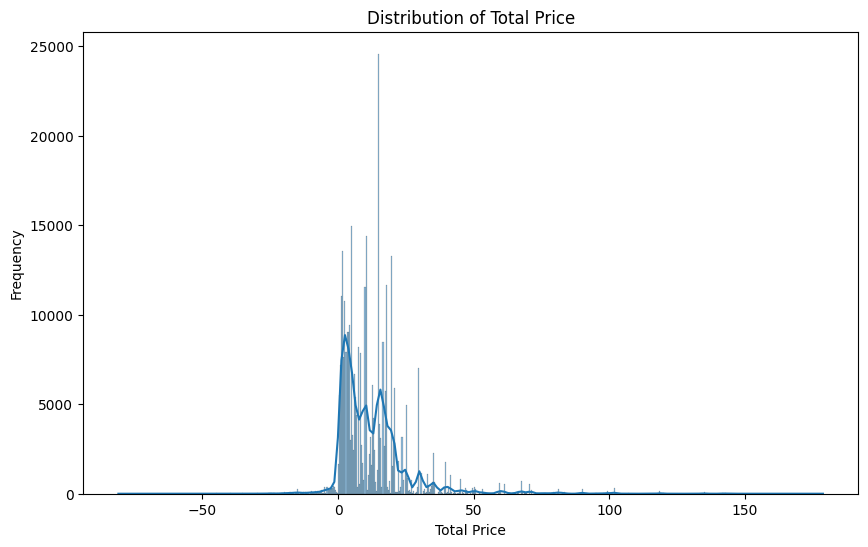

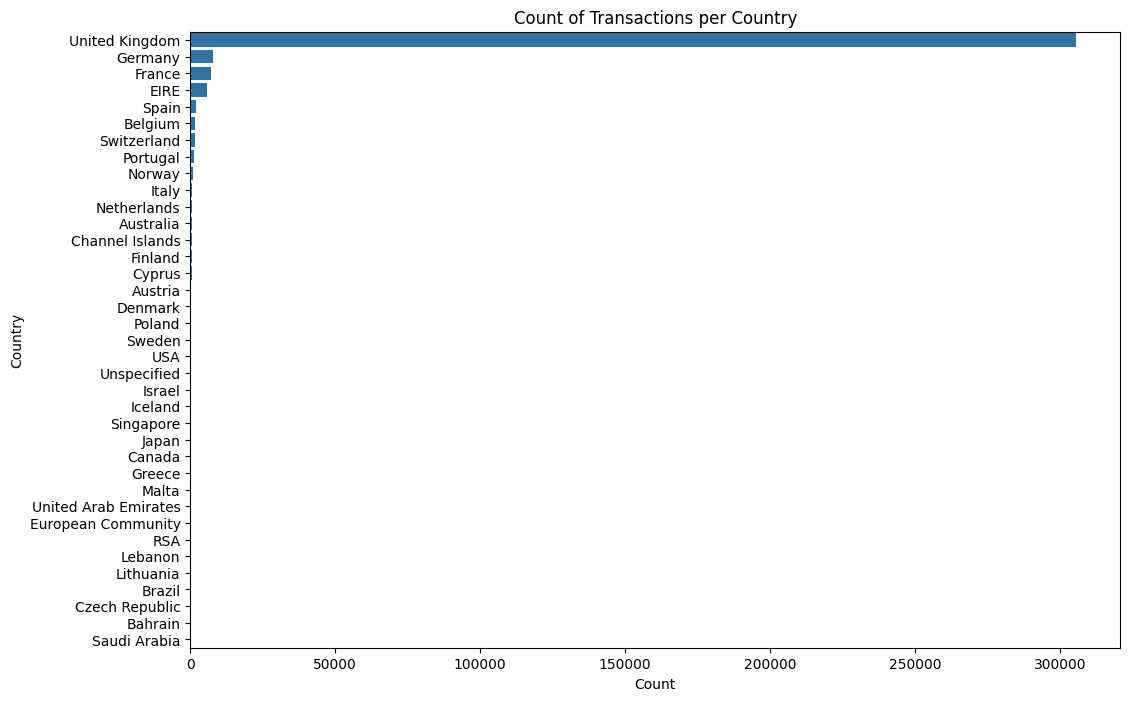

<ipython-input-55-66b34dae5b94>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_for_eda['TotalPrice'].resample('M').sum().plot()


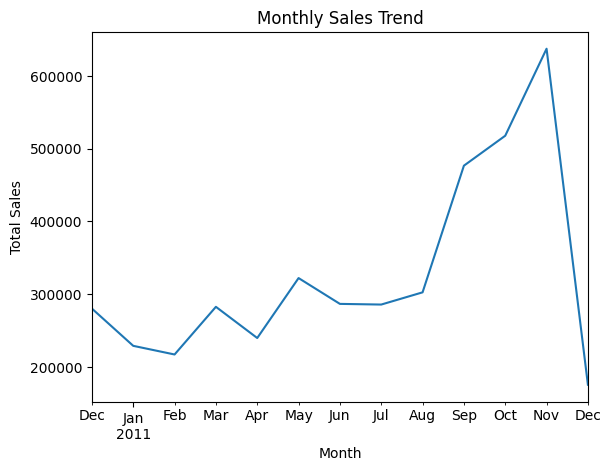

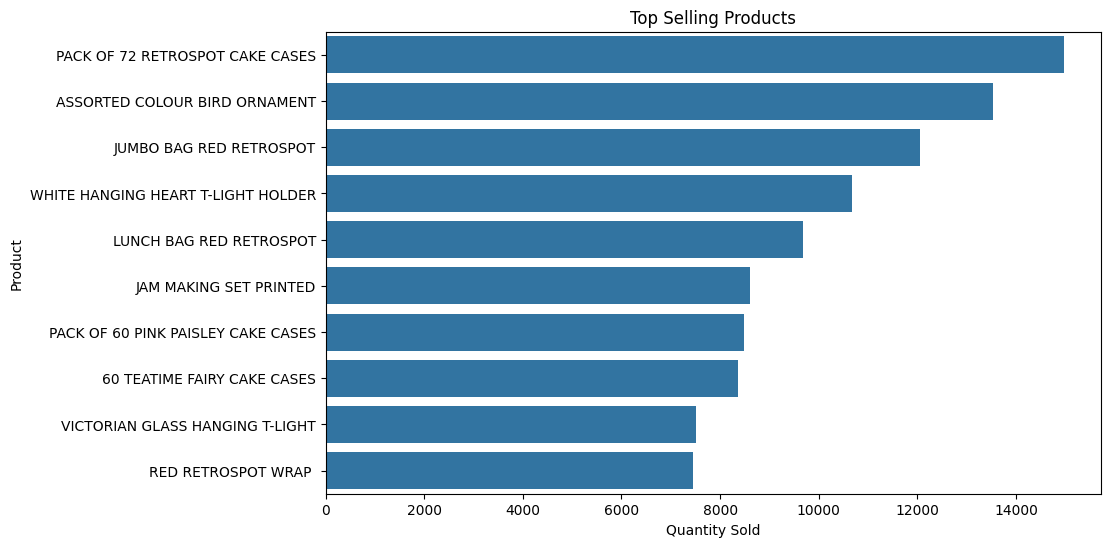

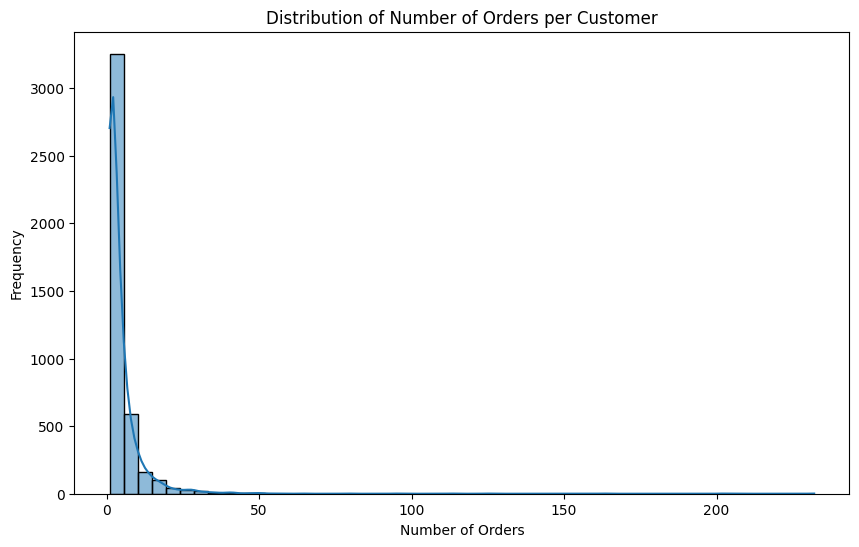

Text(0, 0.5, 'Quantity Sold')

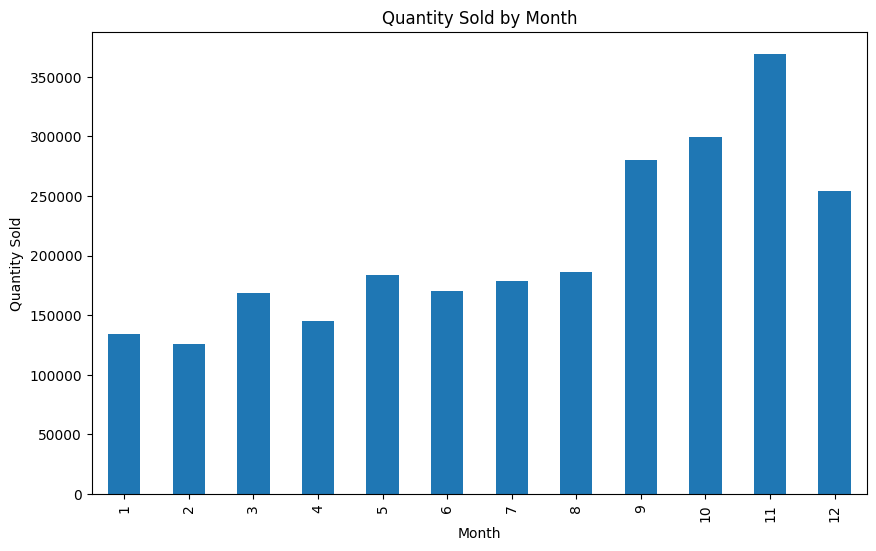

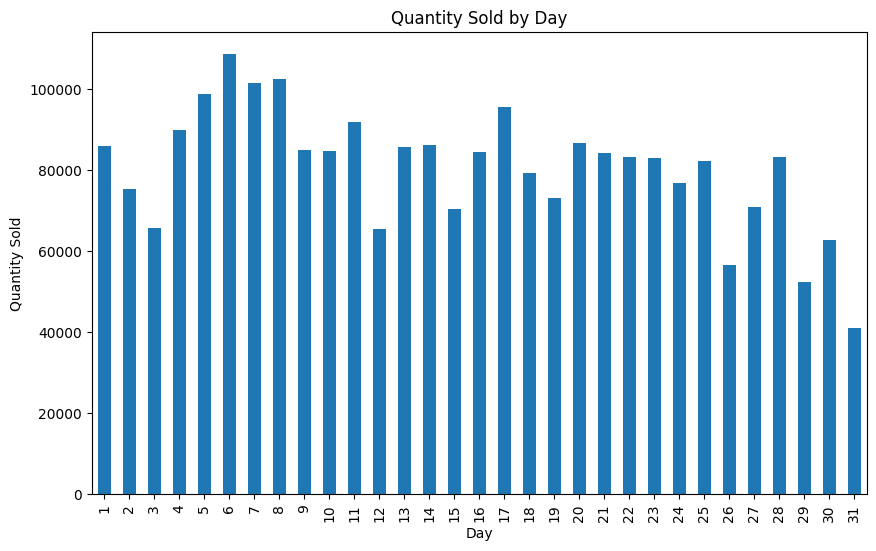

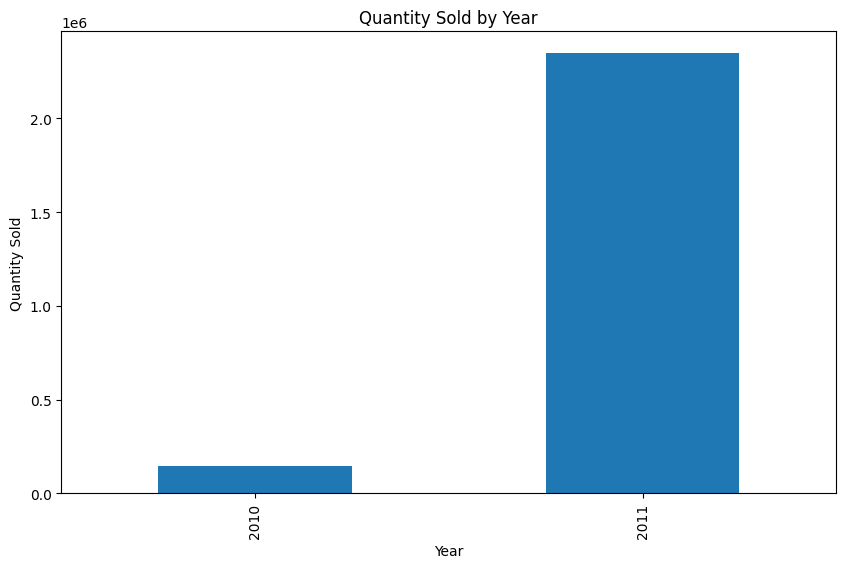

In [55]:
# Distribution of numeric data: Total Price
plt.figure(figsize=(10, 6))
sns.histplot(df_for_eda['TotalPrice'], kde=True)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
#plt.suptitle('Fig.1: Histogram of Total Prices in the Dataset')
plt.show()

# Distribution of categorical data: Transactions per Country
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=df_for_eda, order=df_for_eda['Country'].value_counts().index)
plt.title('Count of Transactions per Country')
plt.xlabel('Count')
plt.ylabel('Country')
#plt.suptitle('Fig.2: Count of Transactions per Country')
plt.show()

# Sales Trends over Time
df_for_eda['InvoiceDate'] = pd.to_datetime(df_for_eda['InvoiceDate'])
df_for_eda.set_index('InvoiceDate', inplace=True)
df_for_eda['TotalPrice'].resample('M').sum().plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
#plt.suptitle('Fig.3: Monthly Sales Trends')
plt.show()

# Top Selling Products
top_products = df_for_eda.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products, y=top_products.index)
plt.title('Top Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
#plt.suptitle('Fig.4: Top Selling Products in the Dataset')
plt.show()

# Distribution of Number of Orders per Customer
orders_per_customer = df_for_eda.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=50, kde=True)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
#plt.suptitle('Fig.5: Distribution of Number of Orders per Customer')
plt.show()


# create bar chart to check quantity by month
plt.figure(figsize=(10, 6))
df_for_eda.groupby('Month')['Quantity'].sum().plot(kind='bar')
plt.title('Quantity Sold by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')

# create bar chart to check quantity by day
plt.figure(figsize=(10, 6))
df_for_eda.groupby('Day')['Quantity'].sum().plot(kind='bar')
plt.title('Quantity Sold by Day')
plt.xlabel('Day')
plt.ylabel('Quantity Sold')

# create bar chart to check quantity by year
plt.figure(figsize=(10, 6))
df_for_eda.groupby('Year')['Quantity'].sum().plot(kind='bar')
plt.title('Quantity Sold by Year')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')

# Your turn!

Repeat the analysis for a supermarket dataset!

1. Load the dataset

In [56]:
# First, we need to load the dataset into Google Colab.
# This statement allows you to select the file from your laptop and upload it to Google Cloud.
# Please wait until you see 100% done and the play button is resumed. it might take a while to upload because the dataset is large

# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()

2. Perform the data preprocessing.

First five rows of the dataset:
  Customer_ID  Age  Num_children  Family_size  Income  Recency  Total_spent  \
0          N1   58             0            1   58138       58         1617   
1          N2   61             2            3   46344       38           27   
2          N3   50             0            2   71613       26          776   
3          N4   31             1            3   26646       26           53   
4          N5   34             1            3   58293       94          422   

   Total_num_purchase  Register_days  MntWines  ...  MntMeatProducts  \
0                  22            971       635  ...              546   
1                   4            125        11  ...                6   
2                  20            472       426  ...              127   
3                   6             65        11  ...               20   
4                  14            321       173  ...              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDeals

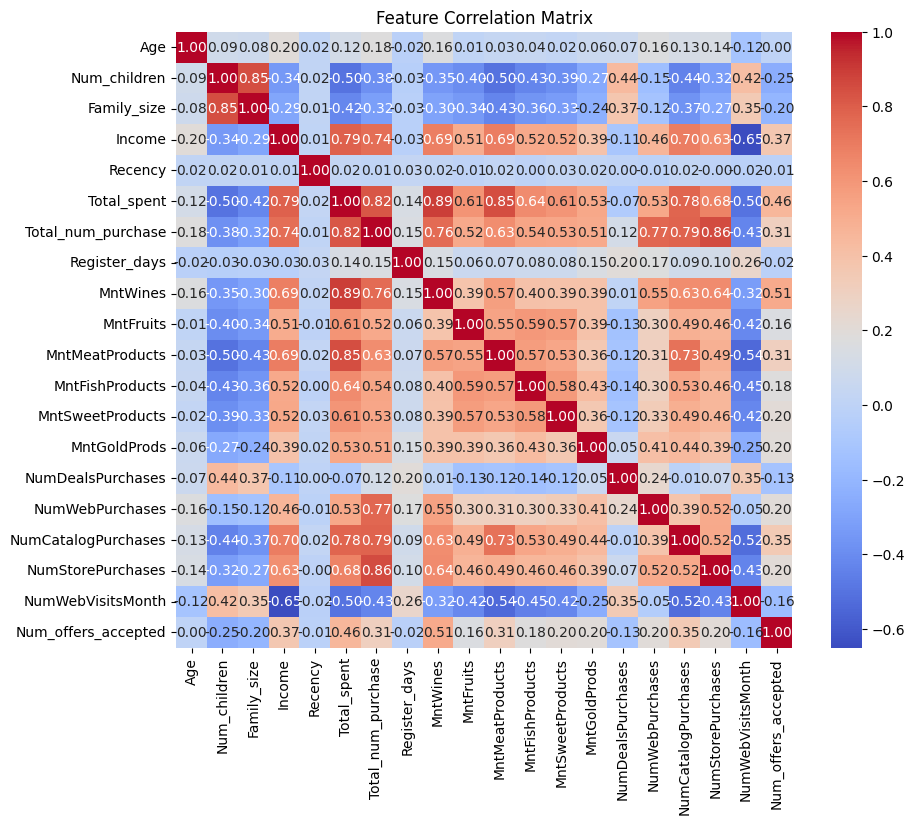

In [57]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df2 = pd.read_csv('supermarket_data_cleaned.csv')

print("First five rows of the dataset:")
print(df2.head())

print("Last five rows of the dataset:")
print(df2.tail())

print("Size of the dataset:")
print(df2.shape)

# First, check and print the number of missing values (if there are any) in the dataset
print("Number of missing values:")
print(df2.isnull().sum())

# Drop rows where customer ID is empty/missing as it's essential for our analysis
df2.dropna(inplace=True)

# 2. Removing duplicates
# Drop duplicate rows to ensure data quality
df2.drop_duplicates(inplace=True)

print("Size of the dataset after removing missing values:")
print(df2.shape)

# Feature Selection
# Compute the correlation matrix to identify relationships between variables
correlation_matrix = df2.corr(numeric_only=True)

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

## EDA

3. Obtain descriptive statistics and Plot the graphs

  Customer_ID  Age  Num_children  Family_size  Income  Recency  Total_spent  \
0          N1   58             0            1   58138       58         1617   
1          N2   61             2            3   46344       38           27   
2          N3   50             0            2   71613       26          776   
3          N4   31             1            3   26646       26           53   
4          N5   34             1            3   58293       94          422   

   Total_num_purchase  Register_days  MntWines  ...  MntMeatProducts  \
0                  22            971       635  ...              546   
1                   4            125        11  ...                6   
2                  20            472       426  ...              127   
3                   6             65        11  ...               20   
4                  14            321       173  ...              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172 

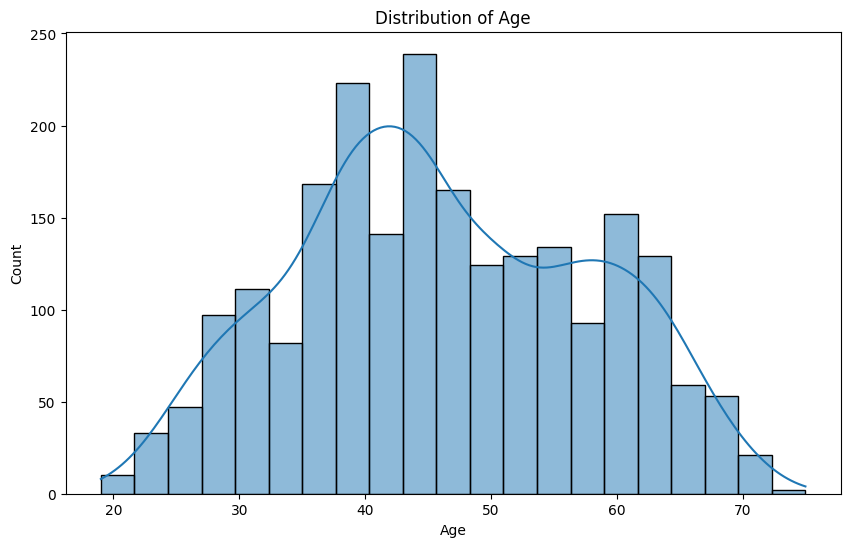

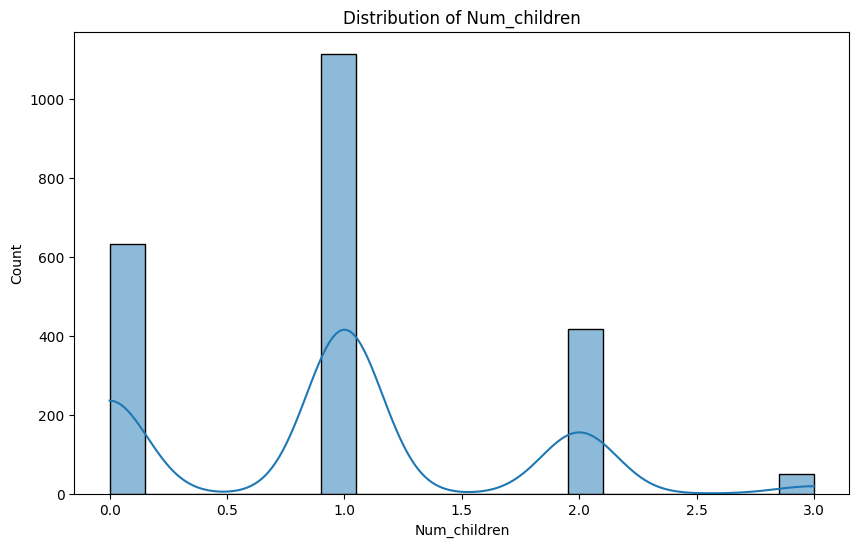

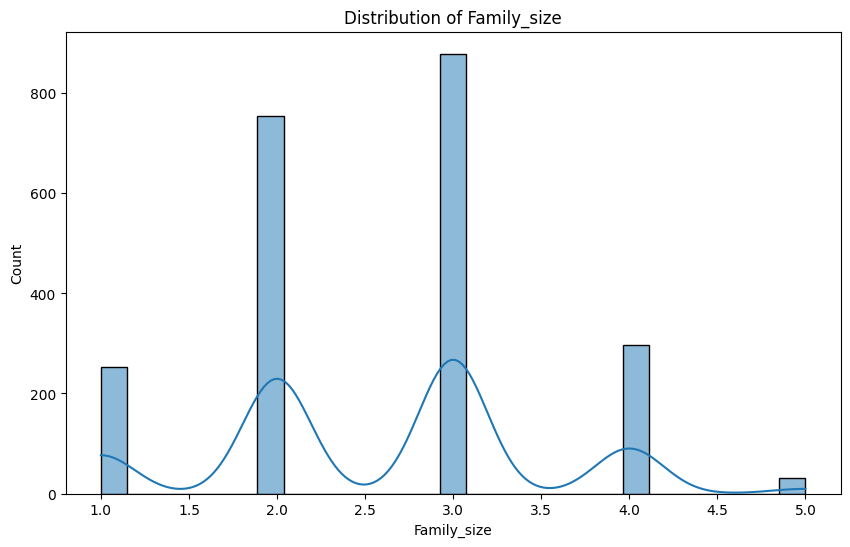

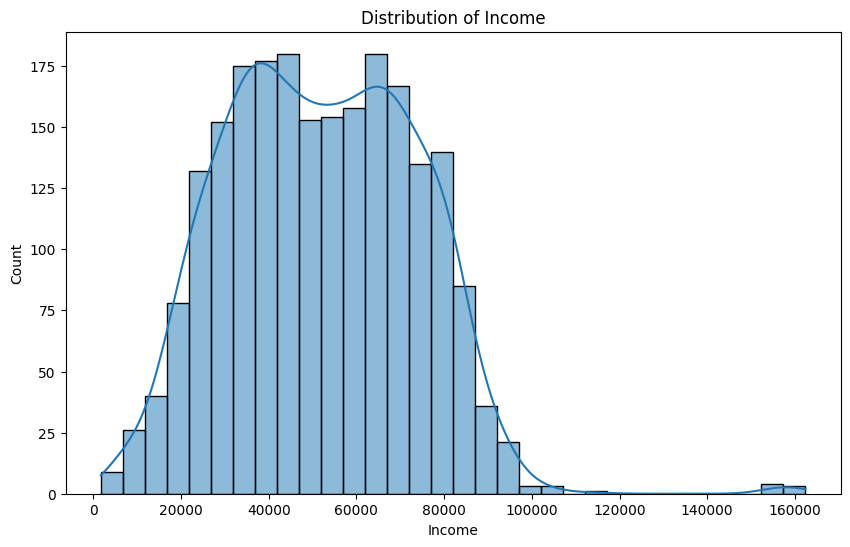

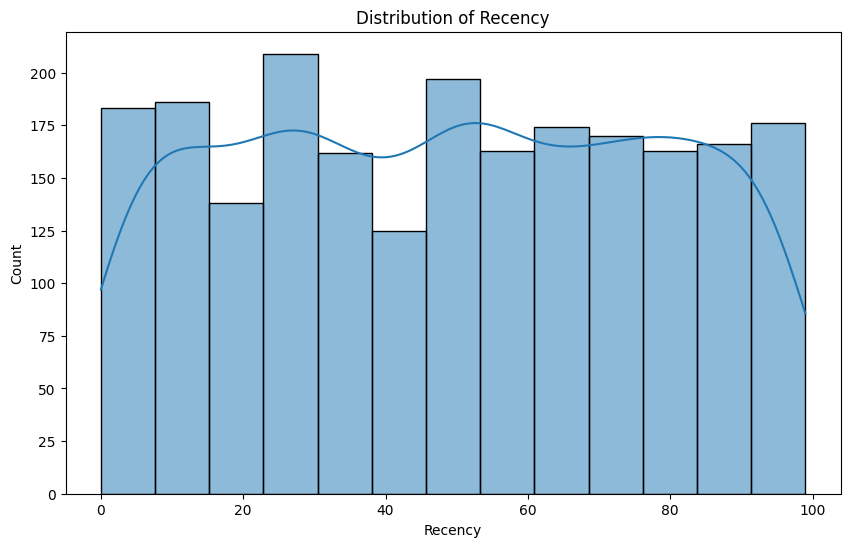

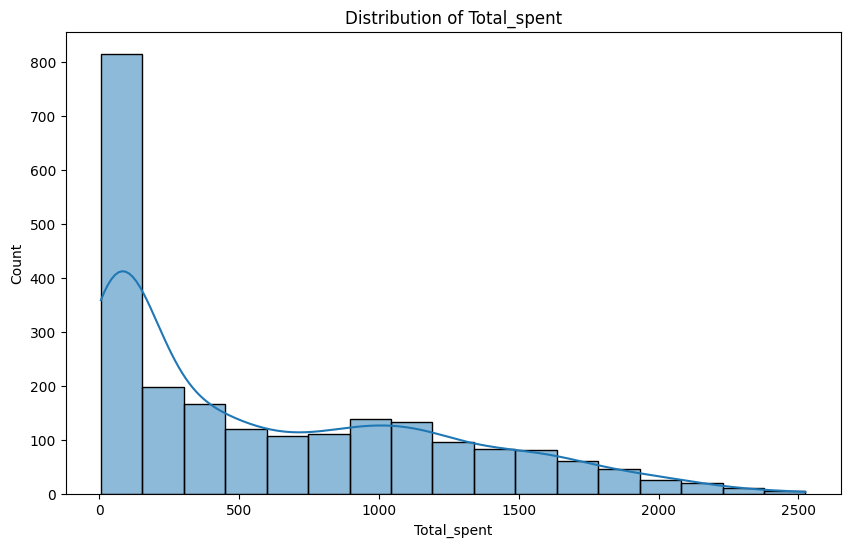

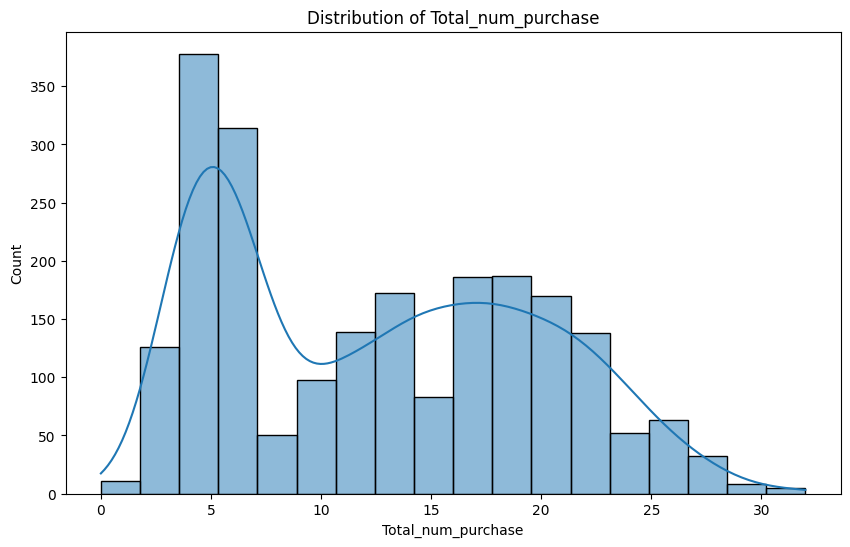

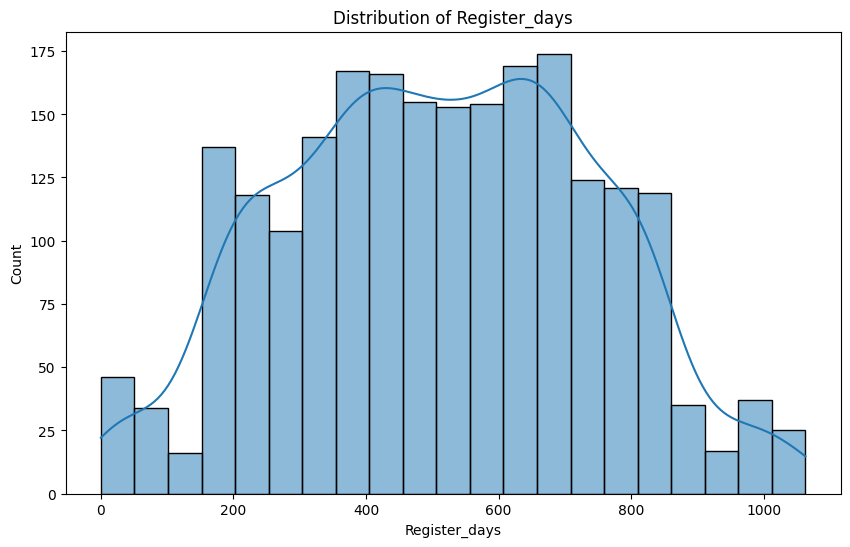

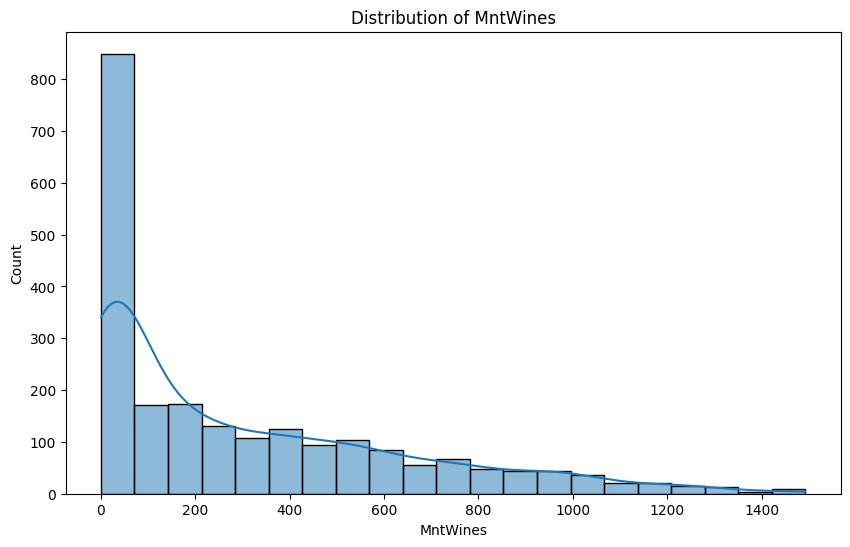

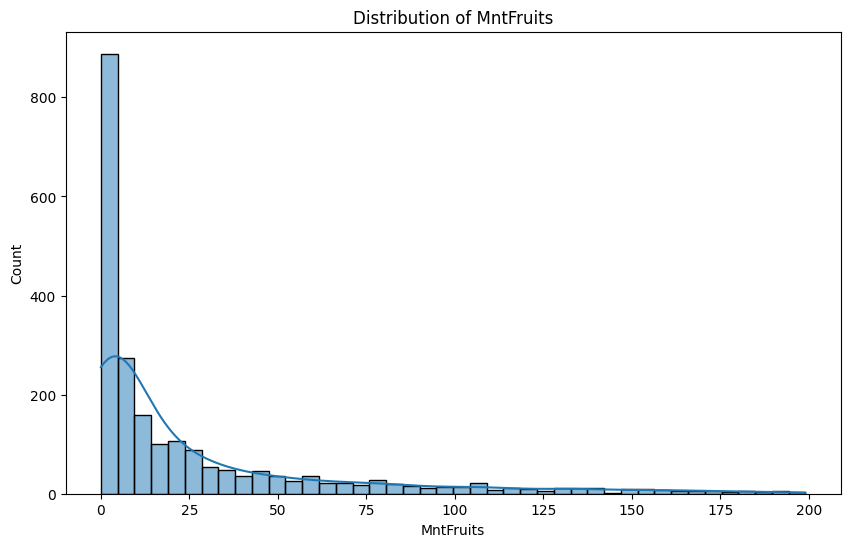

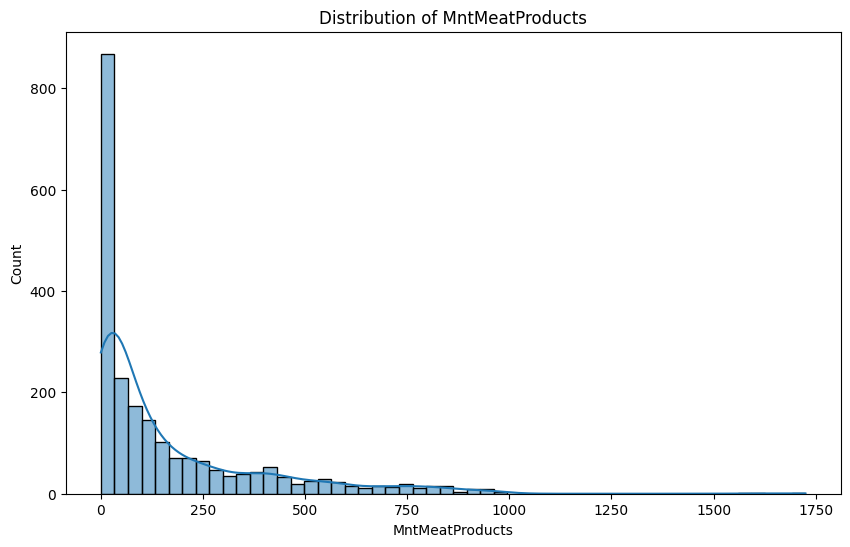

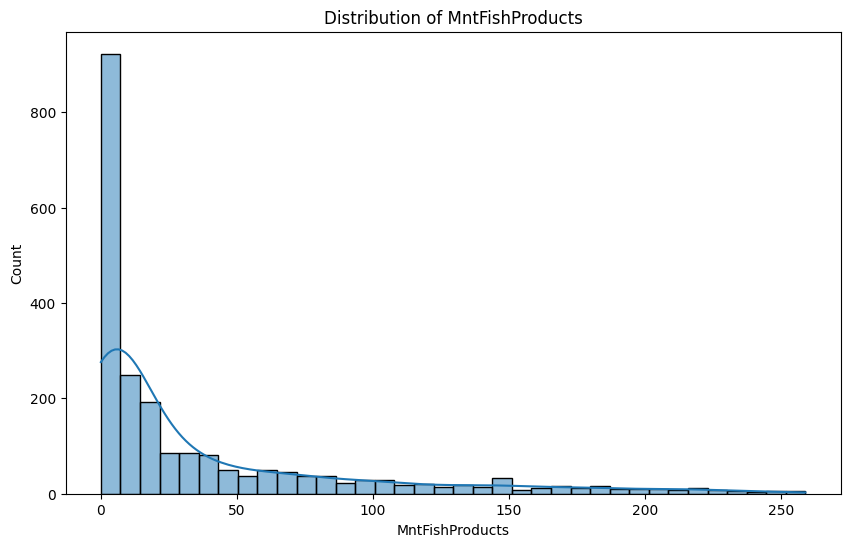

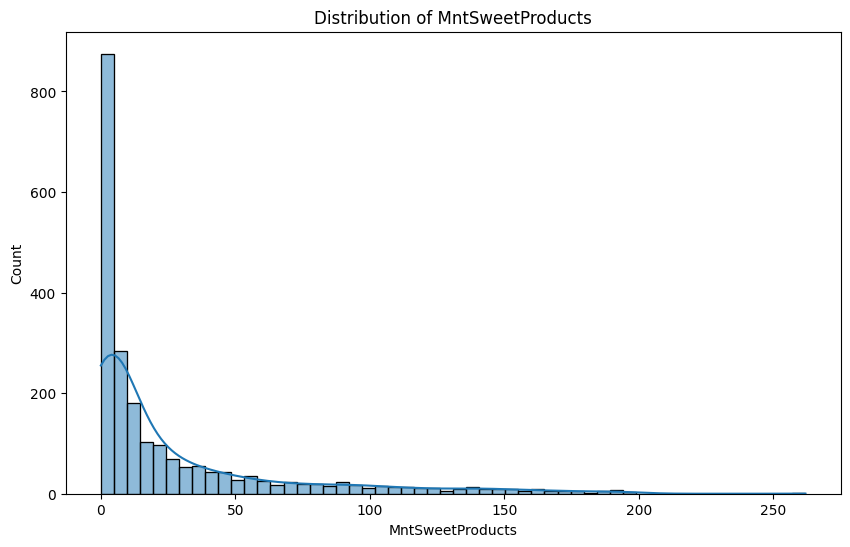

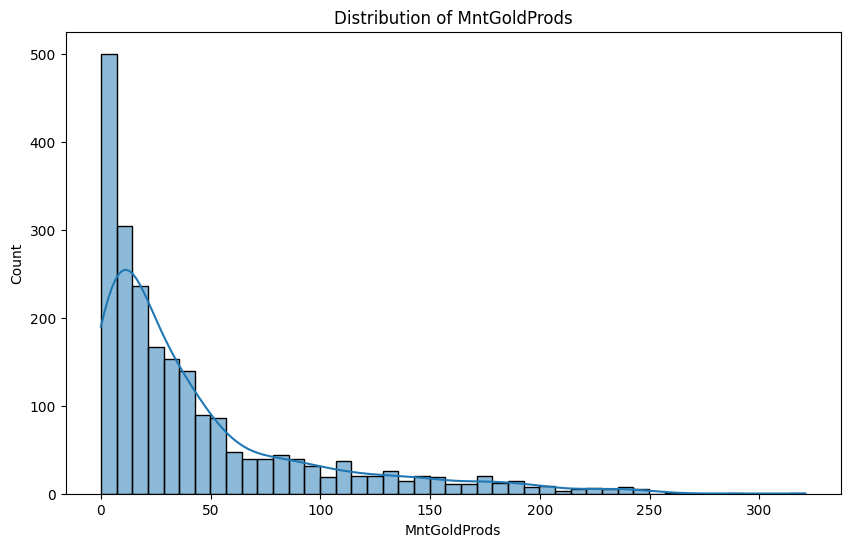

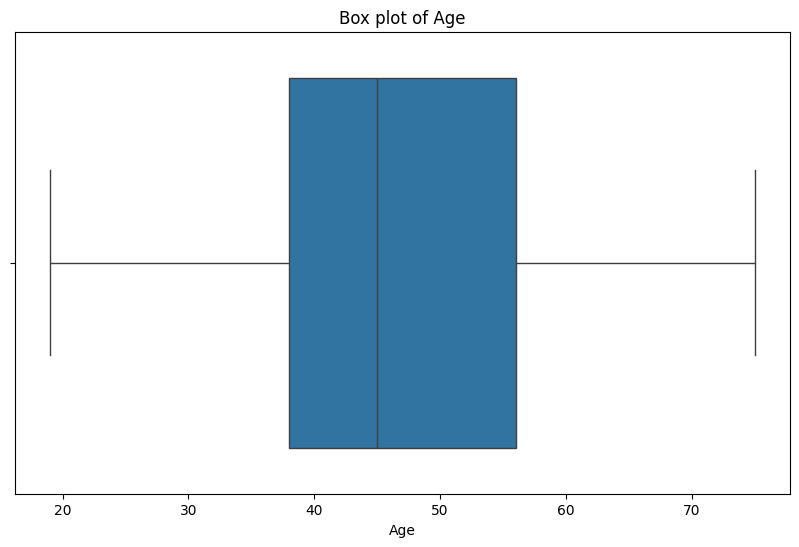

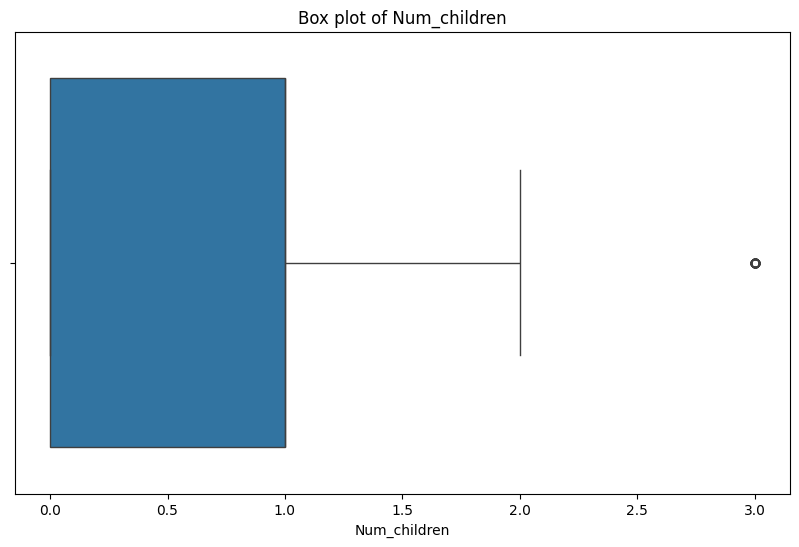

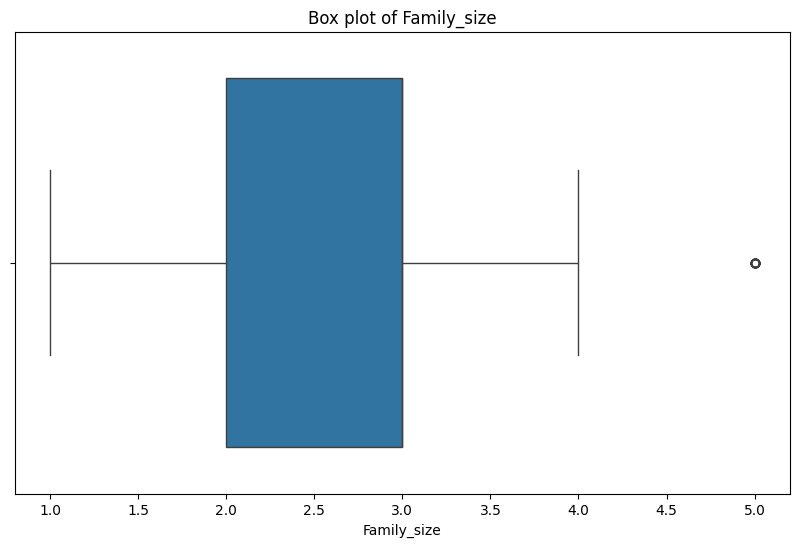

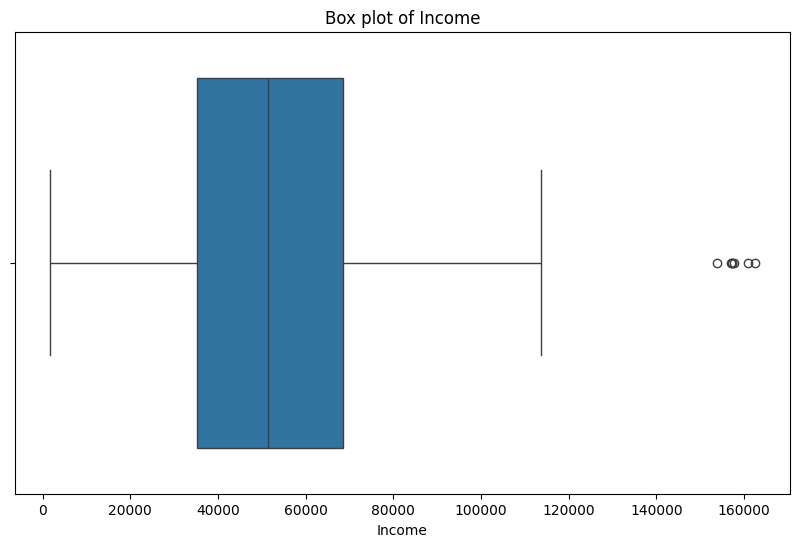

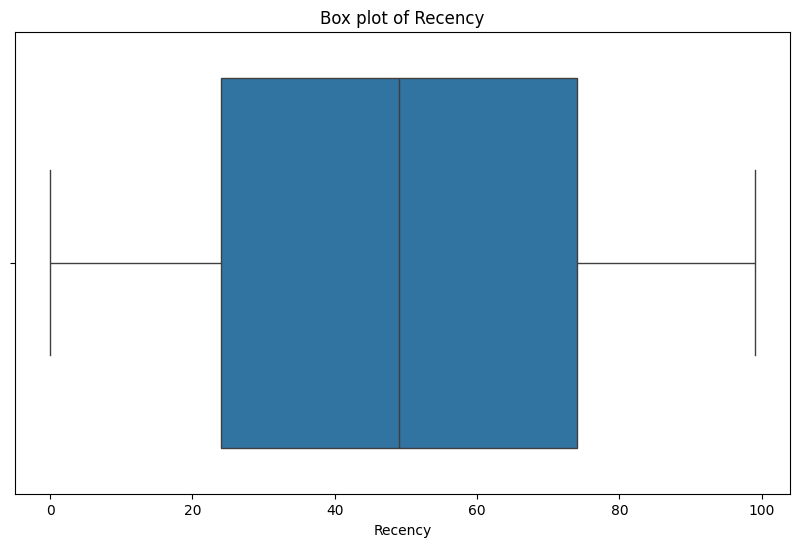

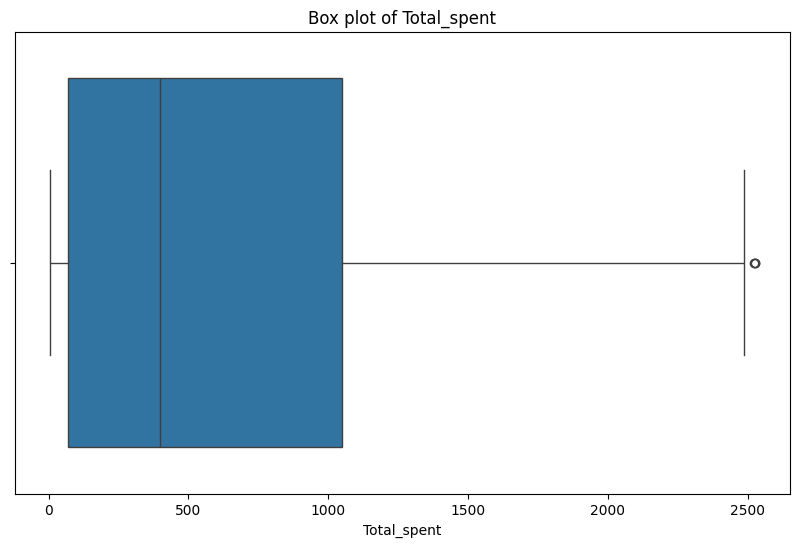

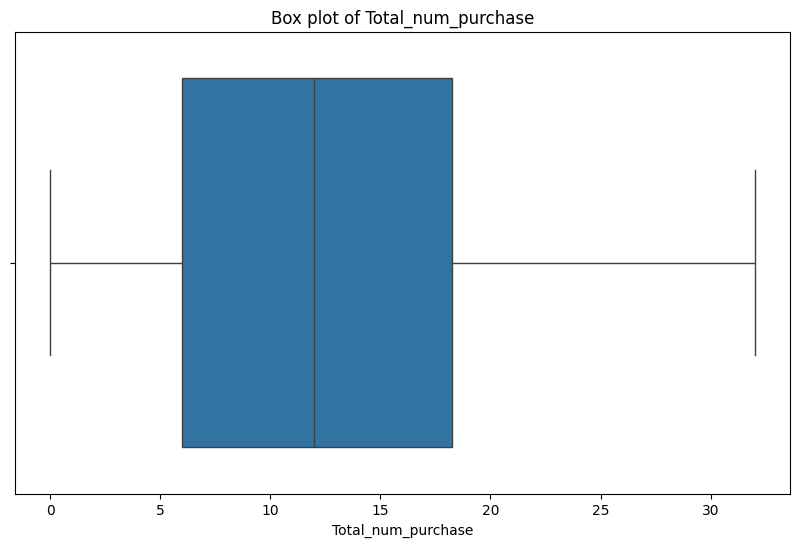

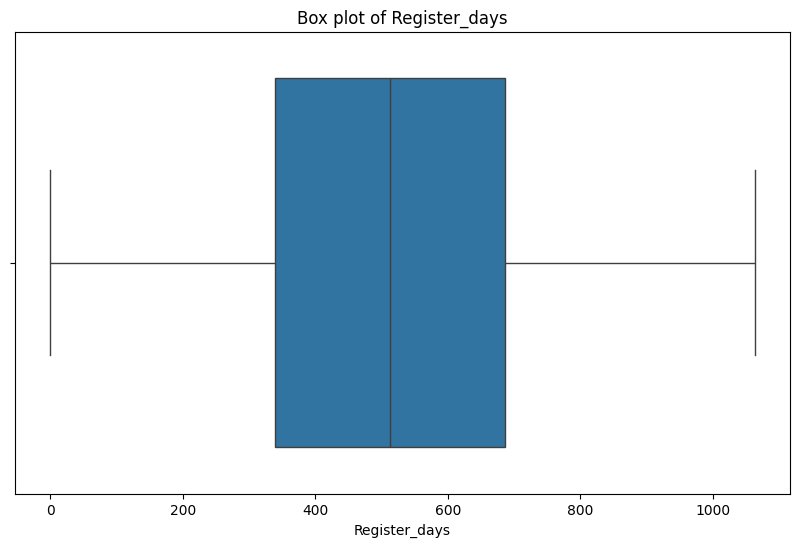

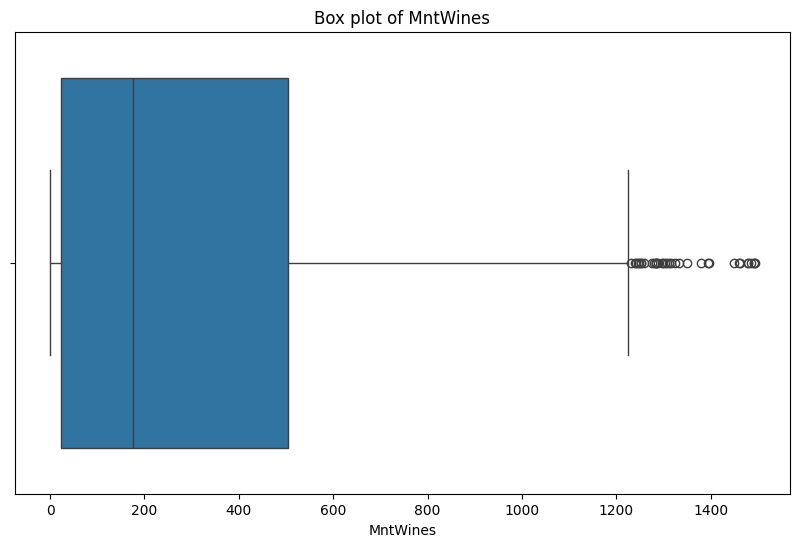

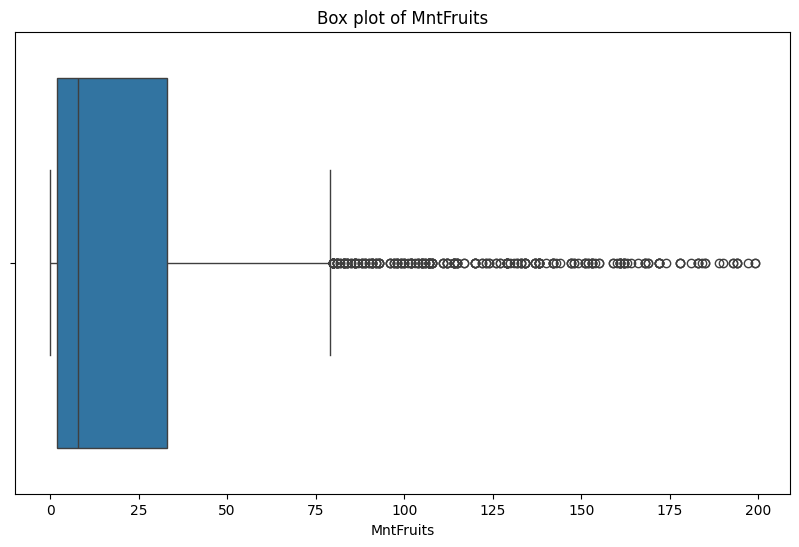

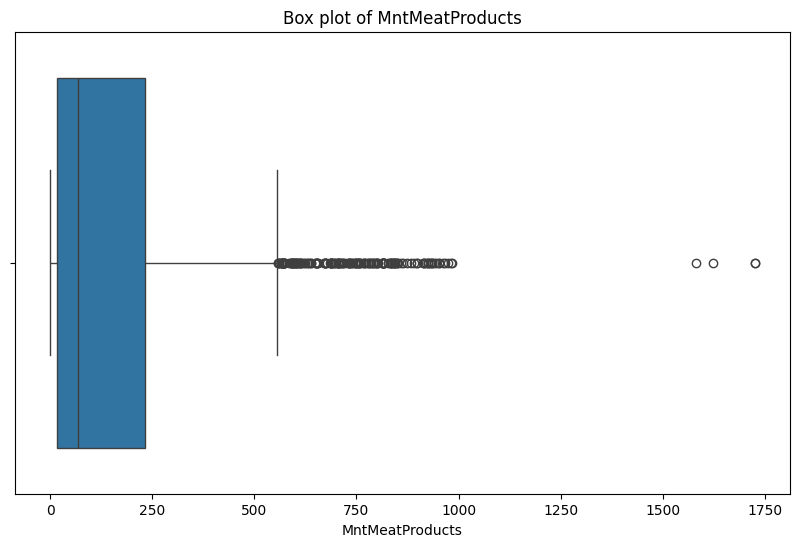

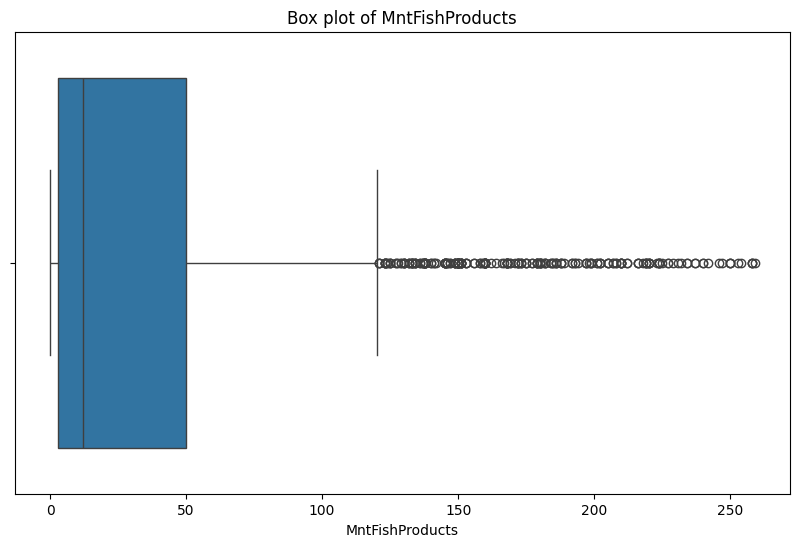

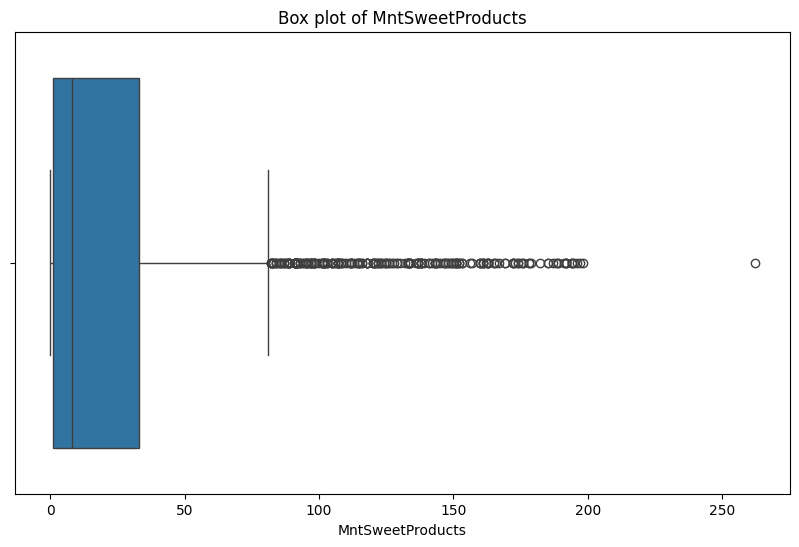

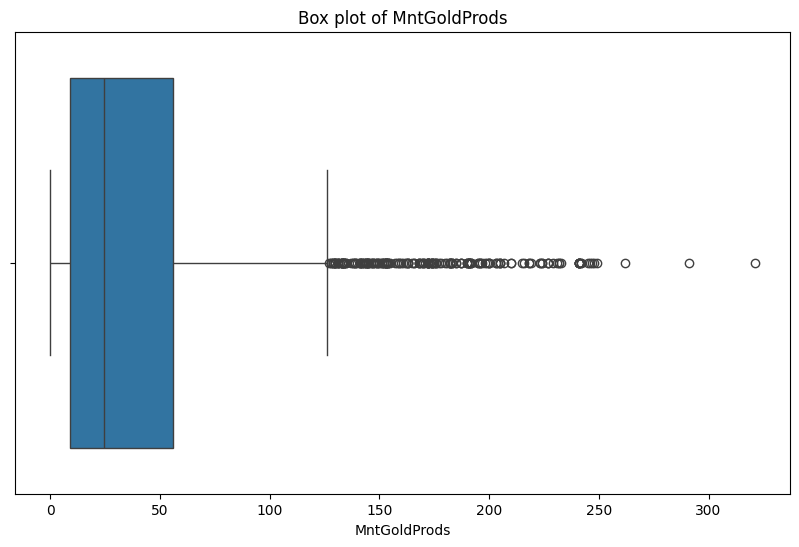

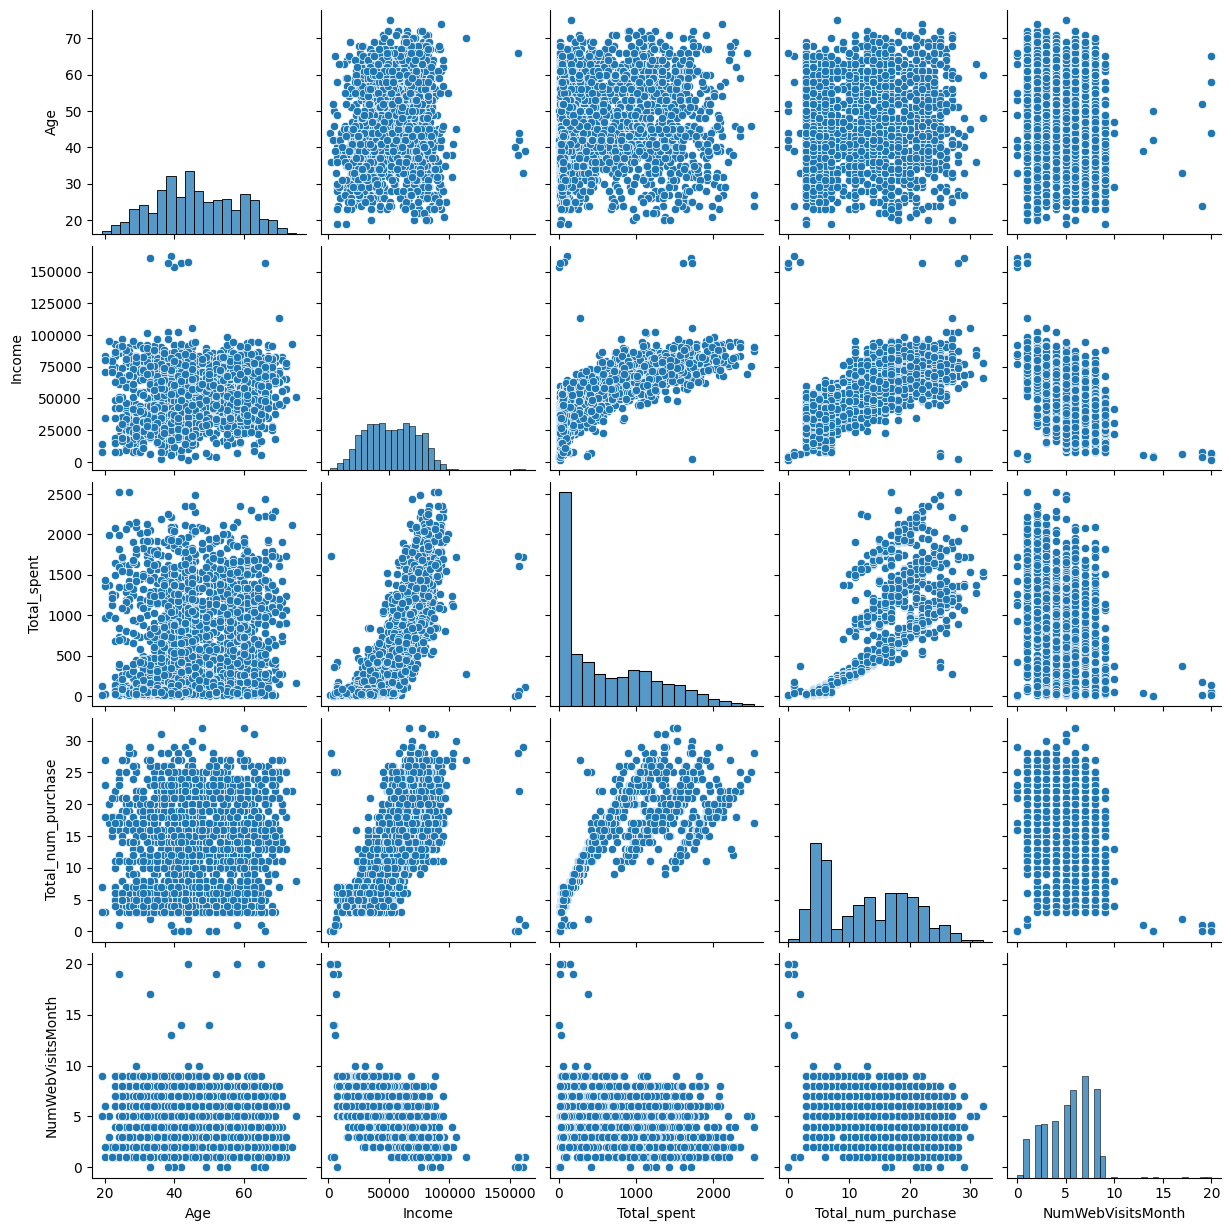

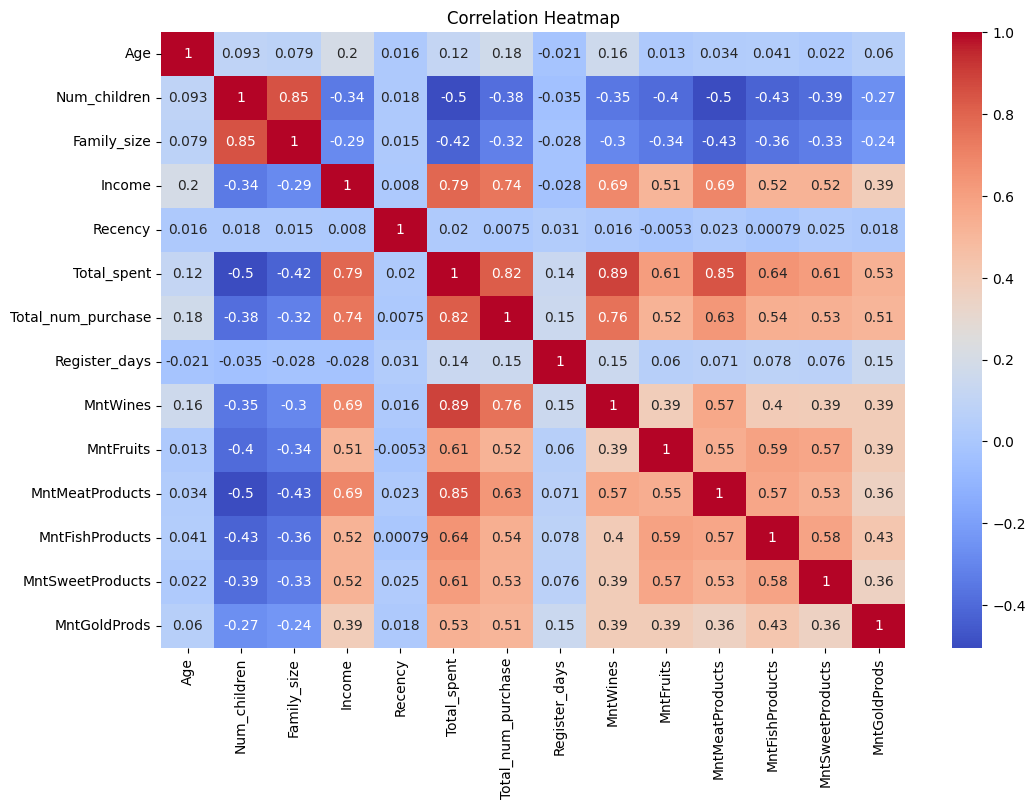

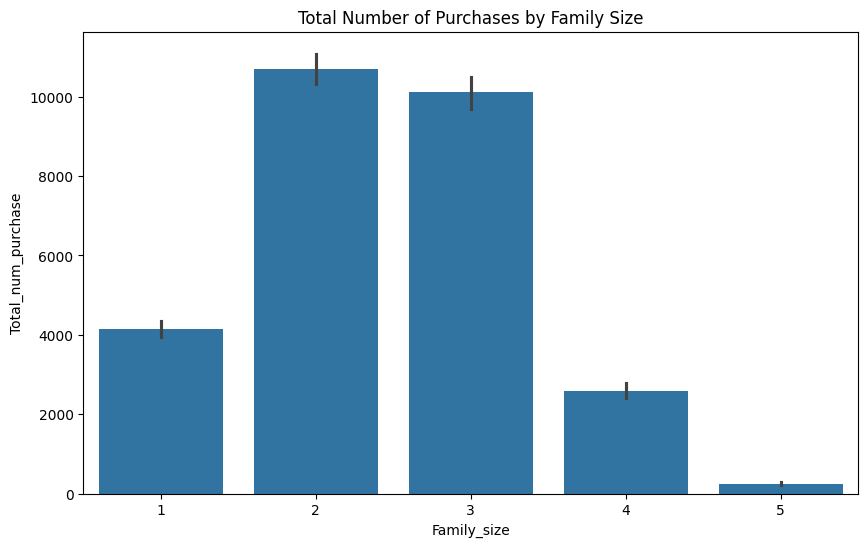

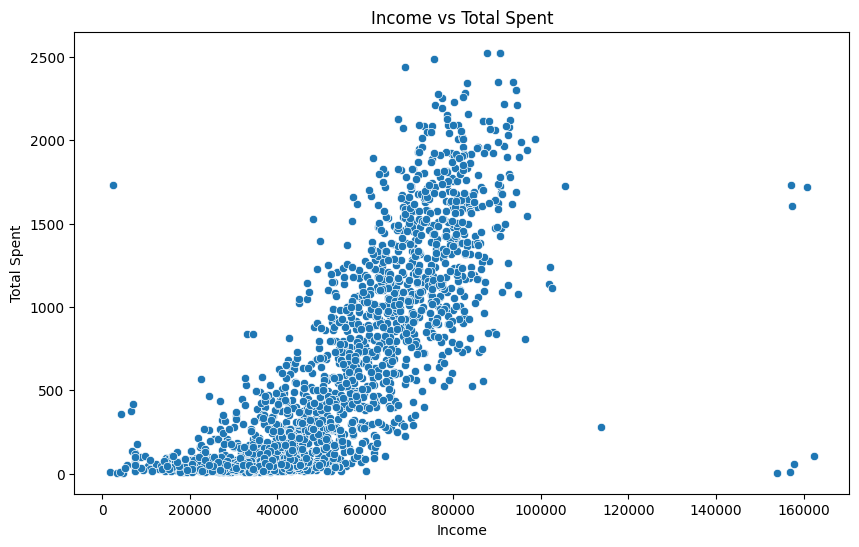

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset to understand its structure
print(df2.head())

# Generate summary statistics for numerical attributes
print(df2.describe())

# Generate counts for categorical attributes if there are any
# In this case, we will assume 'Customer_ID' is categorical (even though it's numerical in nature)
print(df2['Customer_ID'].value_counts())

# Visualizations

# Histograms for numerical attributes
numerical_attributes = ['Age', 'Num_children', 'Family_size', 'Income', 'Recency',
                        'Total_spent', 'Total_num_purchase', 'Register_days', 'MntWines',
                        'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds']
for column in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(df2[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Box plots for numerical attributes to check for outliers
for column in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df2[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Pairwise relationships
# Selecting a few attributes to avoid a very large pairplot
selected_attributes = ['Age', 'Income', 'Total_spent', 'Total_num_purchase', 'NumWebVisitsMonth']
sns.pairplot(df2[selected_attributes])
plt.show()

# Correlation heatmap
correlation_matrix = df2[numerical_attributes].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bar plots for categorical data or discrete numerical data
# Example: Number of purchases by Family Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Family_size', y='Total_num_purchase', data=df2, estimator=sum)
plt.title('Total Number of Purchases by Family Size')
plt.show()

# Scatter plot to explore the relationship between two variables of interest
# Example: Income vs Total Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_spent', data=df2)
plt.title('Income vs Total Spent')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.show()

# Additional analyses can include more specific visualizations, advanced statistical tests,
# or segmentation using clustering algorithms if needed.